# Part 2 - Stage 1 Model Exploration

The purpose of this notebook is to explore different types of machine learning models.

## Library Imports

Python is an incredibly flexible language, partially due to how modular it is. We can extend its basic functionality by importanting 3rd party libraries.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pkg_resources

from binaryTree import Node
from PIL import Image, ImageDraw

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

cwd = os.getcwd()

## Data Analysis

In [2]:
training_set = pd.read_csv("training_set.csv")
record = pd.read_csv('record.csv')

In [3]:
training_set.head()

Result  Season  Team1  Team2  deltaSeed  deltaPointsFor  \
0       1    2003   1421   1411          0       -1.593103   
1       0    2003   1436   1112         15      -17.421182   
2       0    2003   1272   1113         -3       -1.448276   
3       1    2003   1141   1166          5        0.102403   
4       0    2003   1301   1143          1       -2.082759   

   deltaPointsAgainst  deltaFGM  deltaFGA  deltaFGM3  ...  deltaFTM  deltaFTA  \
0            7.614943 -0.354023  1.526437   0.549425  ... -1.434483 -7.135632   
1           -7.112069 -5.493842 -9.852217  -1.759852  ... -4.673645 -5.448276   
2           -3.344828 -0.931034  3.103448   3.000000  ... -2.586207 -3.310345   
3            8.908046 -2.076280 -4.764890  -1.142111  ...  5.397074  5.142111   
4           -1.758621 -3.011494 -5.390805   1.552874  ...  2.387356  0.949425   

    deltaOR   deltaDR  deltaAst   deltaTO  deltaStl  deltaBlk   deltaPF  \
0 -0.890805 -1.627586 -1.165517  0.973563  0.635632  0.766667  0.803448   
1 -2.213054 -1.918719 -3.435961 -0.716749 -1.602217 -1.248768 -1.853448   
2  0.379310  2.655172  1.068966 -0.206897  2.172414  0.827586 -0.655172   
3 -0.292581  0.094044 -1.197492  4.877743 -1.290491 -0.454545  3.692790   
4 -1.508046 -2.345977 -1.333333  0.027586  1.214943  0.273563  1.563218   

   deltaWinPct  
0    -0.151724  
1    -0.237685  
2     0.172414  
3    -0.085684  
4    -0.124138  

[5 rows x 21 columns]

This is where the bulk of the work in machine learning takes place. As you can see, it can be very time consuming to get data into a presentable format. Where the real magic happens is determining what to do with that data once you have it. 

There are several libraries that we will explore to help see the relationships between your data. It is very important to get a good sense of how your features are related to the result before you try to build a model. 

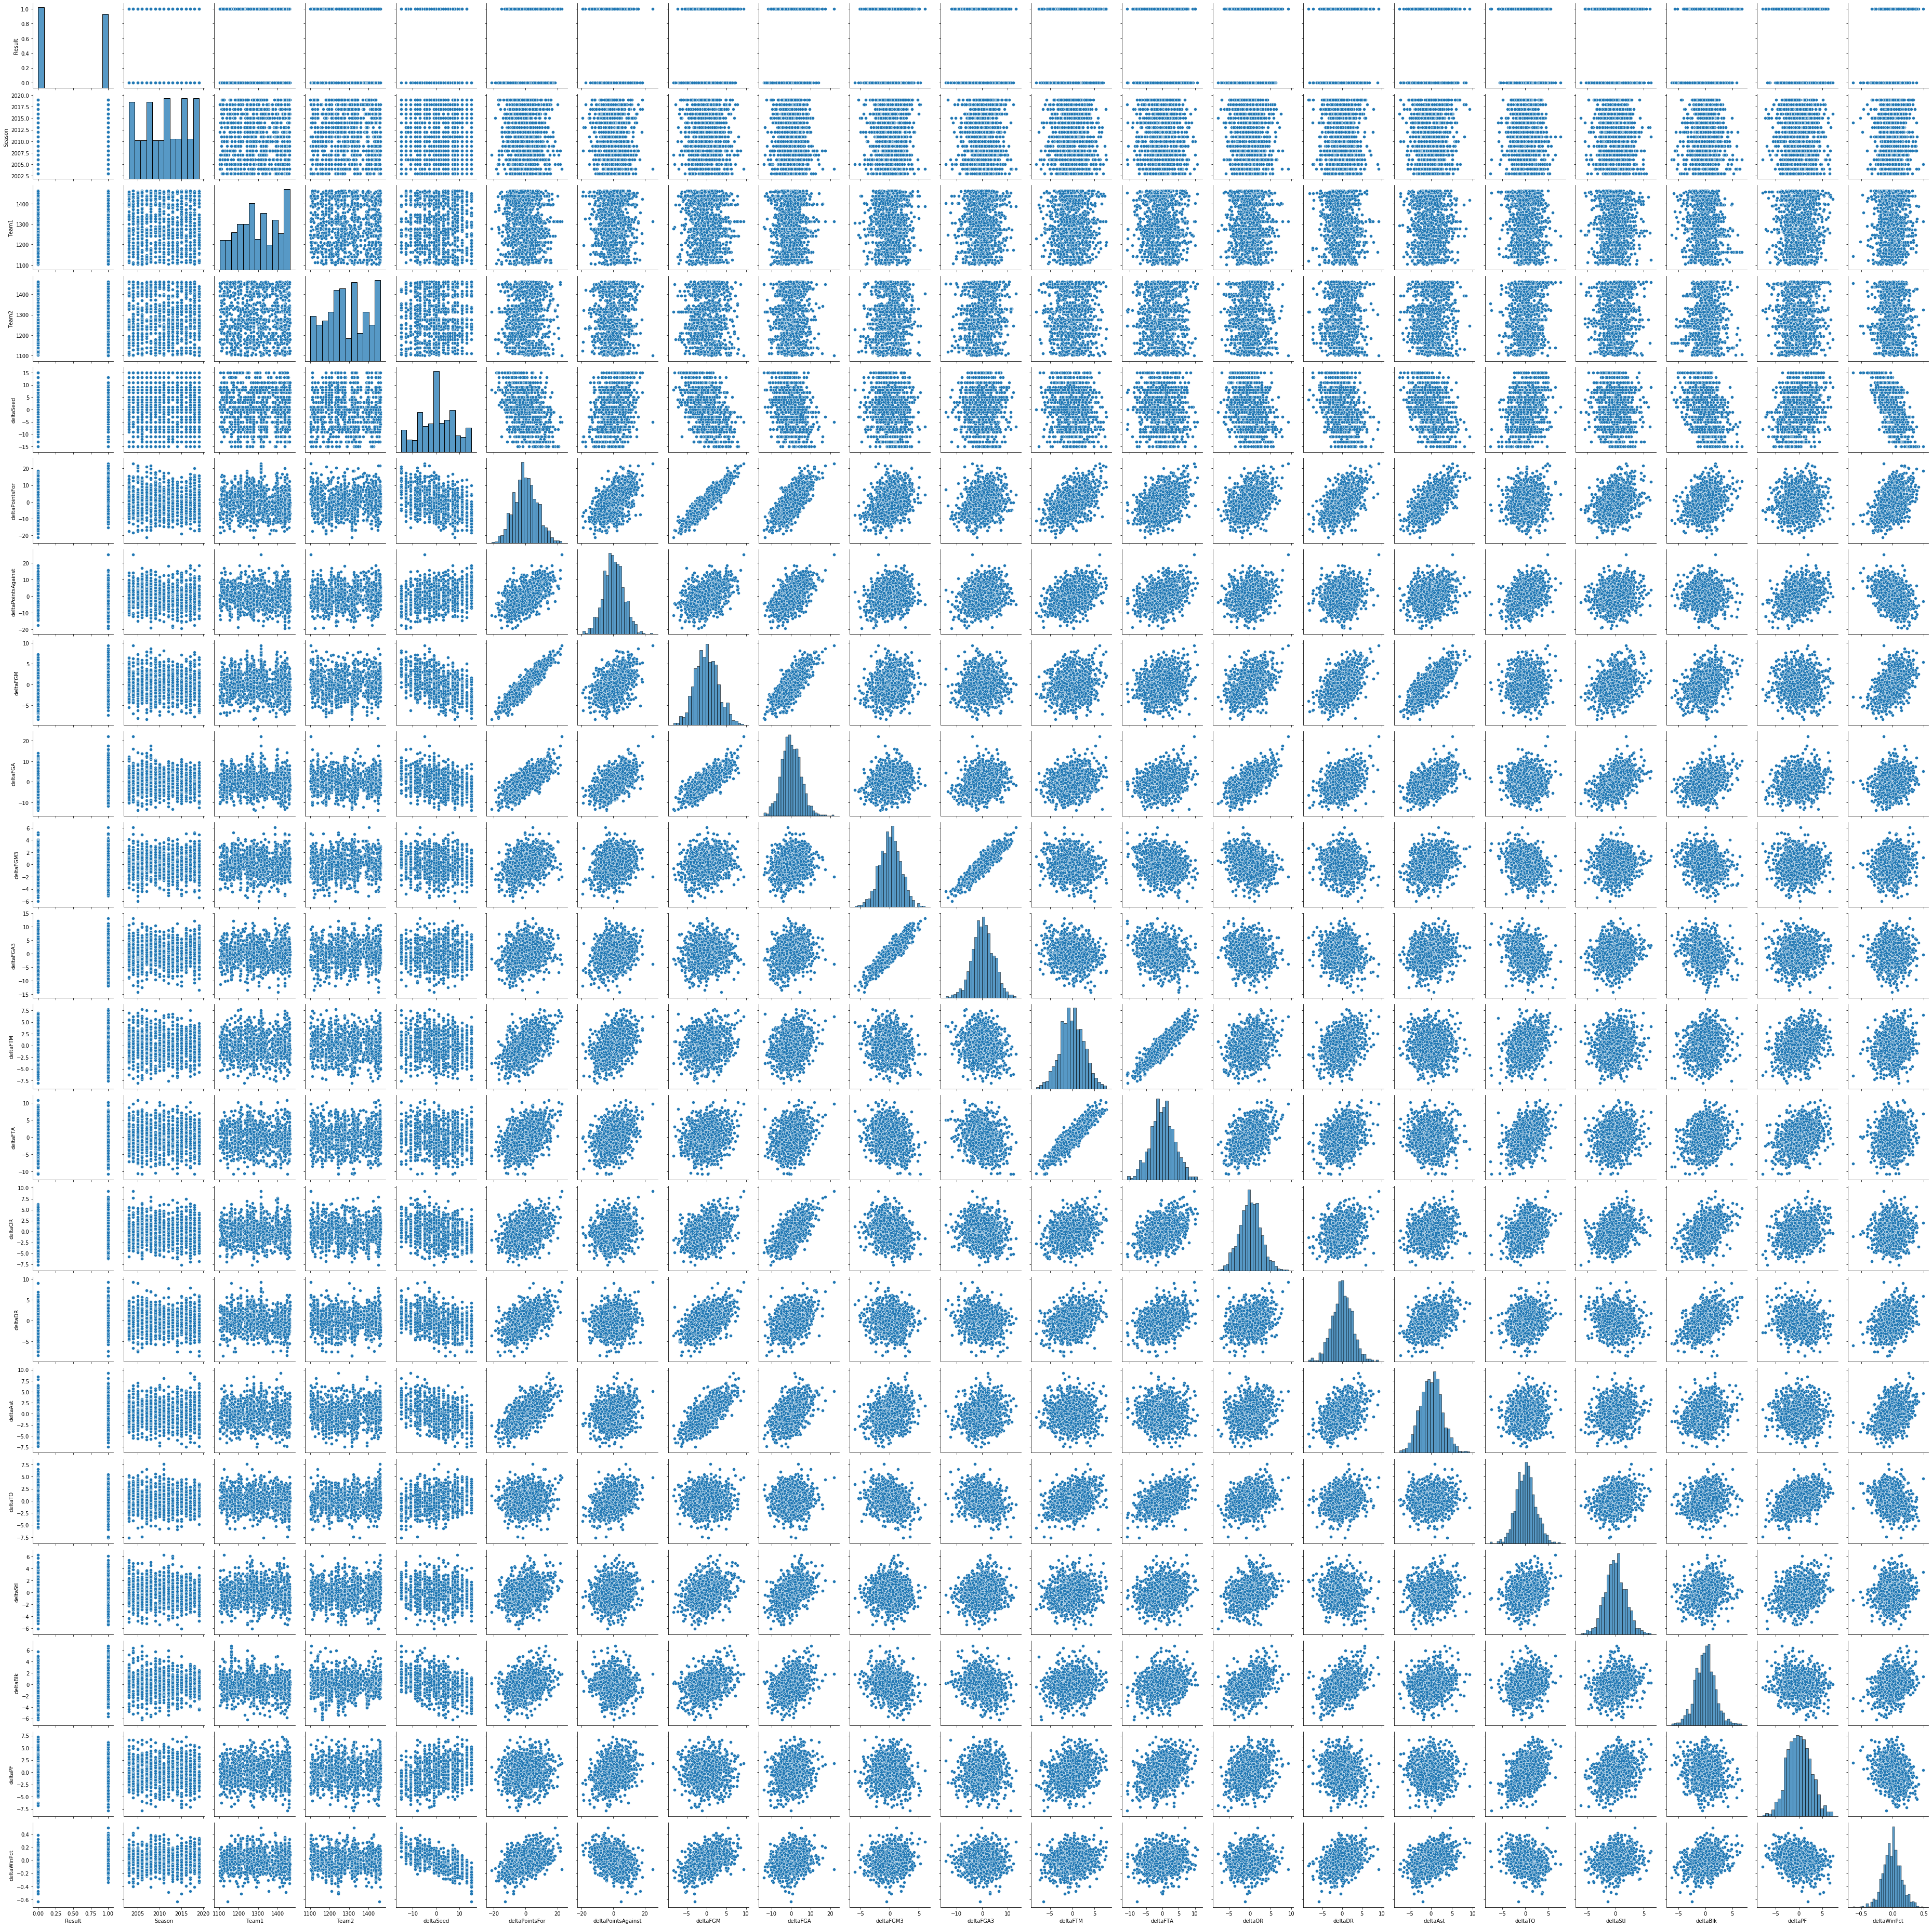

In [145]:
# DO NOT EXECUTE THIS CELL!!!!!

sns.pairplot(data = training_set)

Whew..... thats a lot of data. We have some work to do. 

A very simple tool I like to use to get started is the correlation tool. This lets you see which data is correlated with each other. 

In [4]:
correlation = training_set.corr()

So what did we just do? Well, if we graph a heatmap, you can see that we were able to determine how all variables are linearly related to each other, and visually quickly undertand this relationship. 

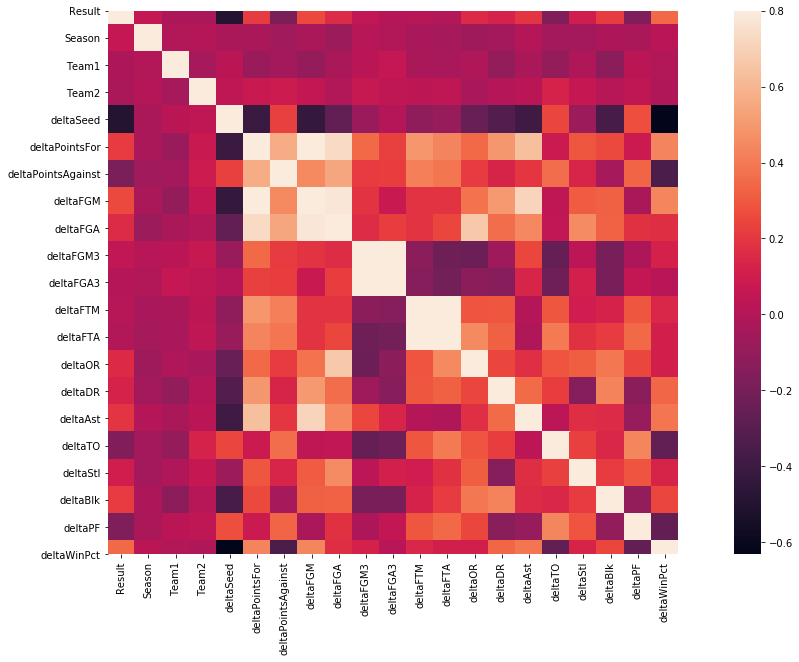

In [6]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.heatmap(correlation, vmax=.8, square=True)

What are some things we notice about this plot? Does it make sense? 

One thing that I think is interesting is the strong relationship between assists, and field goals made. 

The obvious ones are the relationship between field goals made and field goals attempted. 

At no point in this process should you be blindly developing a model. Taking a second to check if your results are rational goes a long way. 

Although this is nice, in reality, we are really only interested in one thing here... RESULTS!

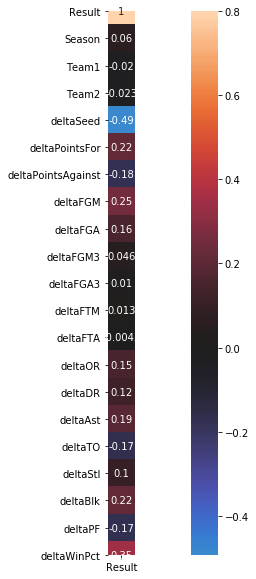

In [7]:
sns.heatmap(correlation[["Result"]], vmax=.8, square=True, center=0, annot=True)

Here you can see that there is not a strong correlation between any of our features and result. It's almost as if this were a difficult machine learning problem with no clear indicator!

## Model Exploration

Here we go, the moment you have all been waiting for. Model creation! 

First thing we are going to do is consider define an X and a y. This should look a lot like a simple linear equation, X being an array of Xs. 

In [8]:
training_set.head()

Result  Season  Team1  Team2  deltaSeed  deltaPointsFor  \
0       1    2003   1421   1411          0       -1.593103   
1       0    2003   1436   1112         15      -17.421182   
2       0    2003   1272   1113         -3       -1.448276   
3       1    2003   1141   1166          5        0.102403   
4       0    2003   1301   1143          1       -2.082759   

   deltaPointsAgainst  deltaFGM  deltaFGA  deltaFGM3  ...  deltaFTM  deltaFTA  \
0            7.614943 -0.354023  1.526437   0.549425  ... -1.434483 -7.135632   
1           -7.112069 -5.493842 -9.852217  -1.759852  ... -4.673645 -5.448276   
2           -3.344828 -0.931034  3.103448   3.000000  ... -2.586207 -3.310345   
3            8.908046 -2.076280 -4.764890  -1.142111  ...  5.397074  5.142111   
4           -1.758621 -3.011494 -5.390805   1.552874  ...  2.387356  0.949425   

    deltaOR   deltaDR  deltaAst   deltaTO  deltaStl  deltaBlk   deltaPF  \
0 -0.890805 -1.627586 -1.165517  0.973563  0.635632  0.766667  0.803448   
1 -2.213054 -1.918719 -3.435961 -0.716749 -1.602217 -1.248768 -1.853448   
2  0.379310  2.655172  1.068966 -0.206897  2.172414  0.827586 -0.655172   
3 -0.292581  0.094044 -1.197492  4.877743 -1.290491 -0.454545  3.692790   
4 -1.508046 -2.345977 -1.333333  0.027586  1.214943  0.273563  1.563218   

   deltaWinPct  
0    -0.151724  
1    -0.237685  
2     0.172414  
3    -0.085684  
4    -0.124138  

[5 rows x 21 columns]

Do define your features, add them to the "cols" array below:

Your choices of features are commented out (currently in blue)

In [10]:
# cols = ['deltaSeed', 'deltaWinPct','deltaPointsFor','deltaPointsAgainst','deltaFGM','deltaFGA','deltaFGM3','deltaFGA3','deltaFTM',
#         'deltaFTA','deltaOR','deltaDR','deltaAst','deltaTO','deltaStl','deltaBlk','deltaPF']
cols = ['deltaSeed', 'deltaPointsFor', 'deltaFGM', 'deltaAst', 'deltaBlk']
# define features as X
X = training_set[cols]
# define target as the Result
y = training_set['Result']   

## Linear - Ordinary Least Squares

Cut to slides - Lets start off with something that everyone is probably familiar with. Ordinary Least Squares

In [11]:
from sklearn import linear_model

We start by creating an instance of a LinearRegression object. 

In [12]:
linearModel = linear_model.LinearRegression()

Then we can fit our X, y data to the object to train the model.

In [13]:
linearModel.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Once the model has been fitted, you can score it as well with the .score() method!

In [14]:
linearModel.score(X,y)

0.24934139754414766

And we can make predictions by passing our X values to the .predict() method.

In [15]:
linearModel.predict(X)

array([0.51181351, 0.00978091, 0.56400184, ..., 0.48050758, 0.62388884,
       0.44836106])

This array of values represents the probability that team 1 will beat team 2 in our X dataframe.

We can write a for loop to check it for all games over all years since 2003.

In [17]:
for year in range(2003,2019):
    X_test = training_set[training_set['Season'] == year][cols]
    y_test = training_set[training_set['Season'] == year]['Result']

    df_results = X_test
    df_results['Prediction'] = linearModel.predict(X_test)
    df_results['Result'] = y_test
    df_results
    
    correct = df_results.loc[(df_results['Result']==0) & (df_results['Prediction']<0.5)].shape[0]
    correct = correct + df_results.loc[(df_results['Result']==1) & (df_results['Prediction']>0.5)].shape[0]

    total = df_results.shape[0]

    accuracy = correct/total

    error = -np.log(1-df_results.loc[df_results['Result'] == 0]['Prediction']).mean()
    print("Year:", year, "Error:", error, "Accuracy:", accuracy)

Year: 2003 Error: 0.4974094471371475 Accuracy: 0.703125
Year: 2004 Error: 0.40844642949836285 Accuracy: 0.765625
Year: 2005 Error: 0.5532181965377734 Accuracy: 0.6875
Year: 2006 Error: 0.5637107607674855 Accuracy: 0.65625
Year: 2007 Error: 0.4413885753241927 Accuracy: 0.796875
Year: 2008 Error: 0.4896683472622852 Accuracy: 0.78125
Year: 2009 Error: 0.5162511148628878 Accuracy: 0.734375
Year: 2010 Error: 0.5429285503045829 Accuracy: 0.65625
Year: 2011 Error: 0.5341584221512768 Accuracy: 0.6716417910447762
Year: 2012 Error: 0.5077995968214666 Accuracy: 0.6567164179104478
Year: 2013 Error: 0.5892328736794737 Accuracy: 0.6716417910447762
Year: 2014 Error: 0.48935850730345803 Accuracy: 0.6567164179104478
Year: 2015 Error: 0.4224340165914218 Accuracy: 0.7910447761194029
Year: 2016 Error: 0.583660909715549 Accuracy: 0.6567164179104478
Year: 2017 Error: 0.48888348088125566 Accuracy: 0.7313432835820896
Year: 2018 Error: 0.5354678367750665 Accuracy: 0.6567164179104478


C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Error is measured in Log Loss. It penalized you for being more or less correct (90% confident and being wrong is penalized more than 52% and being right is rewarded). Accuracy is a straight up "how many are correct/how many total".

## Linear - Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logisticModel = linear_model.LogisticRegression(solver='lbfgs')
logisticModel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
logisticModel.score(X,y)

0.705829596412556

In [21]:
for year in range(2003,2019):
    X_test = training_set[training_set['Season'] == year][cols]
    y_test = training_set[training_set['Season'] == year]['Result']

    df_results = X_test
    df_results['Prediction'] = logisticModel.predict_proba(X_test)[:,1]
    df_results['Result'] = y_test
    df_results

    correct = df_results.loc[(df_results['Result']==0) & (df_results['Prediction']<0.5)].shape[0]
    correct = correct + df_results.loc[(df_results['Result']==1) & (df_results['Prediction']>0.5)].shape[0]

    total = df_results.shape[0]

    accuracy = correct/total

    df_results.loc[df_results['Prediction'] > 0.9, 'Prediction']=0.99
    df_results.loc[df_results['Prediction'] < 0.1, 'Prediction']=0.01

    error = -np.log(1-df_results.loc[df_results['Result'] == 0]['Prediction']).mean()
    print("Year:", year, ","," Error:", error, "Accuracy:", accuracy)

Year: 2003 ,  Error: 0.5009849916761815 Accuracy: 0.71875
Year: 2004 ,  Error: 0.39740938574958035 Accuracy: 0.765625
Year: 2005 ,  Error: 0.5570288484477924 Accuracy: 0.703125
Year: 2006 ,  Error: 0.5704236057586388 Accuracy: 0.65625
Year: 2007 ,  Error: 0.43298220017455297 Accuracy: 0.796875
Year: 2008 ,  Error: 0.48307092798407936 Accuracy: 0.78125
Year: 2009 ,  Error: 0.5119359033161162 Accuracy: 0.734375
Year: 2010 ,  Error: 0.548668157905519 Accuracy: 0.65625
Year: 2011 ,  Error: 0.5344611334757385 Accuracy: 0.6716417910447762
Year: 2012 ,  Error: 0.5105335058559499 Accuracy: 0.6567164179104478
Year: 2013 ,  Error: 0.5957343985961786 Accuracy: 0.6716417910447762
Year: 2014 ,  Error: 0.4898260987759284 Accuracy: 0.6567164179104478
Year: 2015 ,  Error: 0.4136079741670872 Accuracy: 0.8059701492537313
Year: 2016 ,  Error: 0.59976497363927 Accuracy: 0.6567164179104478
Year: 2017 ,  Error: 0.4885158359177667 Accuracy: 0.7313432835820896
Year: 2018 ,  Error: 0.6752430270910904 Accuracy:

## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
RFClassifier = RandomForestClassifier(n_estimators = 10)

In [24]:
RFClassifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
RFClassifier.score(X, y)

0.9820627802690582

Would you look at that! Pack up, lunch and learn over, we have found a model that is almost 100% Accurate!

Seem too good to be true? Then it probably is.

But why?

What is happening is that we are building a perfect model that is overspecifies. If you score based on your training data, your model will be incredibly biased. 

Luckily, we have access to a couple of libraries that help with this! We are going to reserve a certain percentage of data (in this case 10%) to keep out of the training dataset and use it for testing only.  


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

Now, fit the model to the training data.

In [27]:
RFClassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

We can score the training data as well, just to confirm it is still performing very well.

In [28]:
RFClassifier.score(X_train, y_train)

0.9830508474576272

But now lets try scoring our testing data!

In [29]:
RFClassifier.score(X_test, y_test)

0.6517857142857143

That looks much more realistic. Lets see how this one does over the years. 

In [30]:
for year in range(2003,2019):
    X_test = training_set[training_set['Season'] == year][cols]
    y_test = training_set[training_set['Season'] == year]['Result']

    #not sure if this should be :,1 or :,0
    df_results = X_test
    df_results['Prediction'] = RFClassifier.predict_proba(X_test)[:,1]
    df_results['Result'] = y_test
    df_results
    
    df_results.loc[df_results['Prediction'] > 0.9, 'Prediction']=0.99
    df_results.loc[df_results['Prediction'] < 0.1, 'Prediction']=0.01
    
    correct = df_results.loc[(df_results['Result']==0) & (df_results['Prediction']<0.5)].shape[0]
    correct = correct + df_results.loc[(df_results['Result']==1) & (df_results['Prediction']>0.5)].shape[0]

    total = df_results.shape[0]

    accuracy = correct/total

    error = -np.log(1-df_results.loc[df_results['Result'] == 0]['Prediction']).mean()
    print("Year:", year, ","," Error:", error, "Accuracy:", accuracy)

Year: 2003 ,  Error: 0.2133515258762596 Accuracy: 0.875
Year: 2004 ,  Error: 0.19301170269242454 Accuracy: 0.953125
Year: 2005 ,  Error: 0.17547603126304914 Accuracy: 0.90625
Year: 2006 ,  Error: 0.22072659852388168 Accuracy: 0.90625
Year: 2007 ,  Error: 0.16757814037668503 Accuracy: 0.953125
Year: 2008 ,  Error: 0.16812450602490545 Accuracy: 0.953125
Year: 2009 ,  Error: 0.18623021119900493 Accuracy: 0.984375
Year: 2010 ,  Error: 0.18467849662085475 Accuracy: 0.9375
Year: 2011 ,  Error: 0.2604447821837803 Accuracy: 0.9402985074626866
Year: 2012 ,  Error: 0.14745998690417592 Accuracy: 0.9402985074626866
Year: 2013 ,  Error: 0.1548057256531808 Accuracy: 0.8955223880597015
Year: 2014 ,  Error: 0.2641528995827122 Accuracy: 0.8955223880597015
Year: 2015 ,  Error: 0.17939309433960543 Accuracy: 0.9104477611940298
Year: 2016 ,  Error: 0.10973615793348895 Accuracy: 0.9850746268656716
Year: 2017 ,  Error: 0.1730549169124443 Accuracy: 0.9402985074626866
Year: 2018 ,  Error: 0.1922348588881796 Ac

This is still pretty accurate though. Very passable results!

## Neural Network

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [35]:
NeuralNetwork = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,), max_iter=50)

In [36]:
NeuralNetwork.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [37]:
NeuralNetwork.score(X_test, y_test)

0.7053571428571429

### Scaled Data

One thing we can help is scale the data. Remember, neural networks are inherently dumb, so if you can feed it data that has been pre-processed, it will result in a much more accurate result.

For instance, a large number, like FGM is going to be more impactful than a smaller number like FGM3, even though the smaller number may be "more important"

Since this is a common problem as well, there are libraries that will scale the data for us, so all data starts out with equal weights. 

Perform a train, test split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

Create a standard scaler object

In [47]:
scaler = StandardScaler()

Now fit the scaler to the X_train data

In [48]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Now create scaled X_train data

In [49]:
X_train_scaled = scaler.transform(X_train)

Do the same for the test data

In [50]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

Now fit the neural network using the scaled training data

In [51]:
NeuralNetwork.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

And score the neural network using the scaled testing data

In [52]:
NeuralNetwork.score(X_test_scaled, y_test)

0.6964285714285714

It improved a little bit, but not by much. Let's see how it performs over time. 

In [53]:
for year in range(2003,2019):
    X_test = training_set[training_set['Season'] == year][cols]
    y_test = training_set[training_set['Season'] == year]['Result']
    
    scaler = StandardScaler()
    scaler.fit(X_test)
    X_test_scaled = scaler.transform(X_test)
    
    df_results = X_test
    df_results['Prediction'] = NeuralNetwork.predict_proba(X_test_scaled)[:,1]
    df_results['Result'] = y_test
#     df_results
    
    df_results.loc[df_results['Prediction'] > 0.9, 'Prediction']=0.99
    df_results.loc[df_results['Prediction'] < 0.1, 'Prediction']=0.01
    
    correct = df_results.loc[(df_results['Result']==0) & (df_results['Prediction']<0.5)].shape[0]
    correct = correct + df_results.loc[(df_results['Result']==1) & (df_results['Prediction']>0.5)].shape[0]

    total = df_results.shape[0]

    accuracy = correct/total

    error = -np.log(1-df_results.loc[df_results['Result'] == 0]['Prediction']).mean()
    print("Year:", year, ","," Error:", error, "Accuracy:", accuracy)

Year: 2003 ,  Error: 0.49201533832079997 Accuracy: 0.734375
Year: 2004 ,  Error: 0.4274478279825135 Accuracy: 0.75
Year: 2005 ,  Error: 0.587800058631205 Accuracy: 0.6875
Year: 2006 ,  Error: 0.5681990384588467 Accuracy: 0.6875
Year: 2007 ,  Error: 0.4261747988496143 Accuracy: 0.796875
Year: 2008 ,  Error: 0.48928848179287304 Accuracy: 0.78125
Year: 2009 ,  Error: 0.37358376075694905 Accuracy: 0.6875
Year: 2010 ,  Error: 0.5390457401814597 Accuracy: 0.640625
Year: 2011 ,  Error: 0.48922823775943386 Accuracy: 0.6567164179104478
Year: 2012 ,  Error: 0.5056316219781894 Accuracy: 0.6567164179104478
Year: 2013 ,  Error: 0.5756065835401845 Accuracy: 0.6716417910447762
Year: 2014 ,  Error: 0.5585287375580822 Accuracy: 0.6417910447761194
Year: 2015 ,  Error: 0.47275363167135787 Accuracy: 0.7761194029850746
Year: 2016 ,  Error: 0.547313216178979 Accuracy: 0.6567164179104478
Year: 2017 ,  Error: 0.4341403854734068 Accuracy: 0.7313432835820896
Year: 2018 ,  Error: 0.5862660741736039 Accuracy: 0.7

## Grid Search CV

It is possible to have python perform a design of experiment, where we vary a set of parameters and see which combinations of given sets have the best result for use in the model. 

In [54]:
from sklearn.model_selection import GridSearchCV

Focus on only max_iter and hidden_layer_sizes

In [56]:
parameters = {'max_iter': [20,40,60], 'hidden_layer_sizes':[5,10,15,20]}

Optimize parameters

In [57]:
OptimalNeuralNetwork = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

Fit using optimized parameters

In [58]:
OptimalNeuralNetwork.fit(X_train_scaled, y_train)

C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'hidden_layer_sizes': [5, 10, 15, 20],

We can even take a look to see what the best parameters were. They seem to make sense.

In [59]:
OptimalNeuralNetwork.best_params_

{'hidden_layer_sizes': 20, 'max_iter': 40}

In [60]:
for year in range(2003,2019):
    X_test = training_set[training_set['Season'] == year][cols]
    y_test = training_set[training_set['Season'] == year]['Result']

    scaler = StandardScaler()
    scaler.fit(X_test)
    X_test_scaled = scaler.transform(X_test)
    
    df_results = X_test
    df_results['Prediction'] = OptimalNeuralNetwork.predict_proba(X_test_scaled)[:,1]
    df_results['Result'] = y_test
    
    df_results.loc[df_results['Prediction'] > 0.9, 'Prediction']=0.99
    df_results.loc[df_results['Prediction'] < 0.1, 'Prediction']=0.01
    
    correct = df_results.loc[(df_results['Result']==0) & (df_results['Prediction']<0.5)].shape[0]
    correct = correct + df_results.loc[(df_results['Result']==1) & (df_results['Prediction']>0.5)].shape[0]

    total = df_results.shape[0]

    accuracy = correct/total

    error = -np.log(1-df_results.loc[df_results['Result'] == 0]['Prediction']).mean()
    print("Year:", year, ","," Error:", error, "Accuracy:", accuracy)

Year: 2003 ,  Error: 0.5387465891872277 Accuracy: 0.765625
Year: 2004 ,  Error: 0.47630420796307044 Accuracy: 0.71875
Year: 2005 ,  Error: 0.6356129087421271 Accuracy: 0.671875
Year: 2006 ,  Error: 0.6106531895040997 Accuracy: 0.65625
Year: 2007 ,  Error: 0.4965399136875111 Accuracy: 0.8125
Year: 2008 ,  Error: 0.5211138403039152 Accuracy: 0.78125
Year: 2009 ,  Error: 0.41660130216079794 Accuracy: 0.71875
Year: 2010 ,  Error: 0.5738848318950054 Accuracy: 0.640625
Year: 2011 ,  Error: 0.5263459384741437 Accuracy: 0.6417910447761194
Year: 2012 ,  Error: 0.515801817555161 Accuracy: 0.6865671641791045
Year: 2013 ,  Error: 0.5813461502608092 Accuracy: 0.6865671641791045
Year: 2014 ,  Error: 0.5726690611604376 Accuracy: 0.5970149253731343
Year: 2015 ,  Error: 0.530016893461141 Accuracy: 0.7611940298507462
Year: 2016 ,  Error: 0.608496777148653 Accuracy: 0.6417910447761194
Year: 2017 ,  Error: 0.4973604177686141 Accuracy: 0.746268656716418
Year: 2018 ,  Error: 0.5510356724836553 Accuracy: 0.7

This is still not very good. In order to train a good neural network for this, you would need much more computing power and more time to train. This is mostly just for demonstration purposes. 